In [1]:
import numpy as np
import pandas as pd
#mport seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df_store=pd.read_csv('store.csv')
df_store.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [3]:
df_train=pd.read_csv('train.csv')
df_train.head()

C:\Users\Kenji Sugawara\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
df_train=df_train.iloc[:,[0,1,2,4,5,6,7,8,3]]
df_train.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales
0,1,5,2015-07-31,555,1,1,0,1,5263
1,2,5,2015-07-31,625,1,1,0,1,6064
2,3,5,2015-07-31,821,1,1,0,1,8314
3,4,5,2015-07-31,1498,1,1,0,1,13995
4,5,5,2015-07-31,559,1,1,0,1,4822


In [5]:
l=[]
for i in range(len(df_train)) :
    if df_train['Open'][i]==0:
        l.append(i)

In [6]:
l_sales=[]
for i in l :
    if df_train['Sales'][i]!=0:
        l_sales.append(i)
l_sales

[]

In [8]:
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Sales            0
dtype: int64

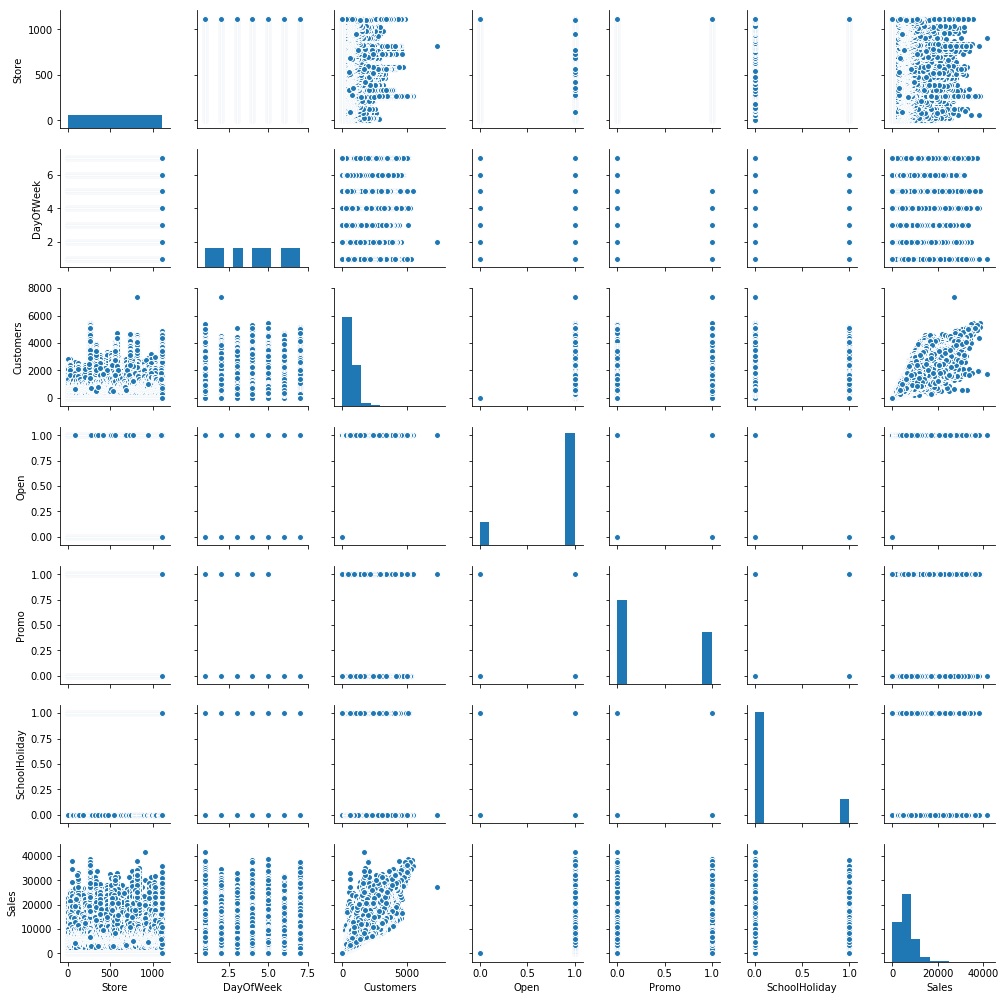

In [15]:
sns.pairplot(df_train, size=2.0)
plt.show()

In [16]:
df_train.corr()

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,Sales
Store,1.000000,-0.000008,0.024325,-0.000047,0.000058,0.000641,0.005126
DayOfWeek,-0.000008,1.000000,-0.386445,-0.528963,-0.392925,-0.205388,-0.462125
Customers,0.024325,-0.386445,1.000000,0.616768,0.316169,0.071568,0.894711
Open,-0.000047,-0.528963,0.616768,1.000000,0.295042,0.086171,0.678472
Promo,0.000058,-0.392925,0.316169,0.295042,1.000000,0.067483,0.452345
SchoolHoliday,0.000641,-0.205388,0.071568,0.086171,0.067483,1.000000,0.085124
Sales,0.005126,-0.462125,0.894711,0.678472,0.452345,0.085124,1.000000


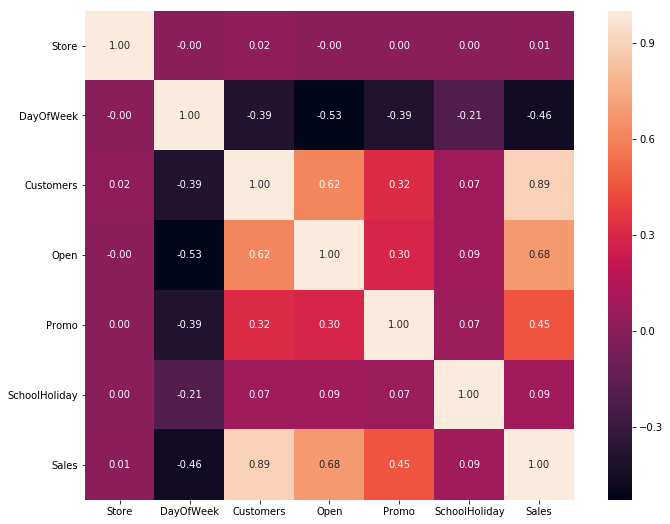

In [17]:
plt.figure(figsize=(12, 9))
sns.heatmap(df_train.corr(), annot=True, square=True, fmt='.2f')
plt.show()

In [9]:
df_test=pd.read_csv('test.csv')
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [10]:
df_test['Open']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        1.0
10       1.0
11       1.0
12       1.0
13       1.0
14       1.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       1.0
22       1.0
23       1.0
24       1.0
25       1.0
26       1.0
27       1.0
28       1.0
29       1.0
        ... 
41058    1.0
41059    1.0
41060    1.0
41061    1.0
41062    1.0
41063    1.0
41064    1.0
41065    1.0
41066    1.0
41067    1.0
41068    1.0
41069    1.0
41070    1.0
41071    1.0
41072    1.0
41073    1.0
41074    1.0
41075    1.0
41076    1.0
41077    1.0
41078    1.0
41079    1.0
41080    1.0
41081    1.0
41082    1.0
41083    1.0
41084    1.0
41085    1.0
41086    1.0
41087    1.0
Name: Open, Length: 41088, dtype: float64

In [15]:
df_train_notOpen=df_train.copy()
df_train_notOpen=df_train_notOpen.iloc[l,:]

In [16]:
df_train_open=df_train.drop(l)

In [17]:
len(df_train)

1017209

In [18]:
len(df_train_open)

844392

In [19]:
len(df_train_notOpen)

172817

In [20]:
X0=pd.get_dummies(df_train_open,columns=['DayOfWeek','Promo','StateHoliday','SchoolHoliday'],drop_first=True)

In [21]:
X0.head()

,Store,Date,Customers,Open,Sales,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Promo_1,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday_1
0,1,2015-07-31,555,1,5263,0,0,0,1,0,0,1,1,0,0,0,1
1,2,2015-07-31,625,1,6064,0,0,0,1,0,0,1,1,0,0,0,1
2,3,2015-07-31,821,1,8314,0,0,0,1,0,0,1,1,0,0,0,1
3,4,2015-07-31,1498,1,13995,0,0,0,1,0,0,1,1,0,0,0,1
4,5,2015-07-31,559,1,4822,0,0,0,1,0,0,1,1,0,0,0,1


In [22]:
y=X0.iloc[:,4].values
X=X0.iloc[:,5:].values

In [23]:
l2=[]
for i in range(len(y)) :
    if y[i]==0:
        l2.append(i)
l2

[73090,
 116587,
 163494,
 266468,
 273680,
 282020,
 282530,
 283461,
 286975,
 287474,
 288402,
 289331,
 321253,
 321361,
 321415,
 321492,
 322830,
 322834,
 330590,
 338756,
 339899,
 363527,
 364640,
 396116,
 397231,
 418142,
 423927,
 435198,
 440124,
 465486,
 466599,
 483941,
 485053,
 490978,
 492088,
 618249,
 622462,
 641859,
 669931,
 671043,
 679617,
 680728,
 703085,
 725890,
 726715,
 727826,
 734763,
 738481,
 773613,
 809107,
 815859,
 816967,
 822419,
 829604]

In [24]:
y2=y[y!=0]
#indexがl2に含まれるものを抜いた

In [25]:
y0=y[y==0]
#indexがl2に含まれるもの

In [26]:
X2=np.delete(X,l2,axis=0)

In [27]:
len(y2)

844338

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.3, random_state = 0)

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [30]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
print(lr.intercept_,lr.coef_)

6599.873401055119 [-1084.50260467 -1440.37343731 -1449.78187859 -1054.64397547
 -1003.03528797  1370.91572987  2300.87314555   320.3951685
  1602.76592505  2353.01642853  3946.39535618   247.41774592]


In [32]:
print('R^2')
print('train: %.3f' % lr.score(X_train, y_train))
print('test : %.3f' % lr.score(X_test, y_test))

R^2
train: 0.164
test : 0.162


In [33]:
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score
print('adjusted R^2')
print('train: %3f' % adjusted(lr.score(X_train, y_train), len(y_train), 2))
print('test : %3f' % adjusted(lr.score(X_test, y_test), len(y_test), 2))

adjusted R^2
train: 0.164131
test : 0.162189


In [34]:
print('RMSPE')
print('%.3f' %(np.mean(((y_train-lr.predict(X_train))/y_train)**2)))
print('%.3f' %(np.mean(((y_test-lr.predict(X_test))/y_test)**2)))

RMSPE
0.314
0.288


In [64]:
# LASSO回帰を実行
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=5)    
model_lasso.fit(X_train, y_train)

Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
#Lassoでの係数
print(model_lasso.intercept_) 
print(model_lasso.coef_) 

6555.642108948154
[ -933.86329055 -1288.94443559 -1291.68232723  -901.94707511
  -873.96018802   293.03923459  2276.01284232   257.683882
     0.             0.             0.           210.64349056]


In [66]:
print('adjusted R^2')
print('train: %3f' % adjusted(lr.score(X_train, y_train), len(y_train), 2))
print('test : %3f' % adjusted(lr.score(X_test, y_test), len(y_test), 2))
print('='*10)
print('train: %3f' % adjusted(model_lasso.score(X_train, y_train), len(y_train), 2))
print('test : %3f' % adjusted(model_lasso.score(X_test, y_test), len(y_test), 2))

adjusted R^2
train: 0.164131
test : 0.162189
train: 0.162676
test : 0.160785


In [67]:
print('RMSPE')
print('%.3f' %(np.mean(((y_train-lr.predict(X_train))/y_train)**2)))
print('%.3f' %(np.mean(((y_test-lr.predict(X_test))/y_test)**2)))

print('==========')
print('%.3f' %(np.mean(((y_train-model_lasso.predict(X_train))/y_train)**2)))
print('%.3f' %(np.mean(((y_test-model_lasso.predict(X_test))/y_test)**2)))

RMSPE
0.314
0.288
0.309
0.283


In [70]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [71]:
print('adjusted R^2')
print('train: %3f' % adjusted(lr.score(X_train, y_train), len(y_train), 2))
print('test : %3f' % adjusted(lr.score(X_test, y_test), len(y_test), 2))
print('='*10)
print('train: %3f' % adjusted(model_xgb.score(X_train, y_train), len(y_train), 2))
print('test : %3f' % adjusted(model_xgb.score(X_test, y_test), len(y_test), 2))

adjusted R^2
train: 0.164131
test : 0.162189
train: 0.176170
test : 0.174146


In [72]:
print('RMSPE')
print('%.3f' %(np.mean(((y_train-lr.predict(X_train))/y_train)**2)))
print('%.3f' %(np.mean(((y_test-lr.predict(X_test))/y_test)**2)))

print('==========')
print('%.3f' %(np.mean(((y_train-model_xgb.predict(X_train))/y_train)**2)))
print('%.3f' %(np.mean(((y_test-model_xgb.predict(X_test))/y_test)**2)))

RMSPE
0.314
0.288
0.309
0.282


In [71]:
X_tes=pd.get_dummies(df_test,columns=['DayOfWeek','Promo','StateHoliday','SchoolHoliday'],drop_first=True)

In [86]:
X_test=X_tes.iloc[:,4:]
X_test['StateHoliday_0']=np.zeros(len(X_test))
X_test['StateHoliday_b']=np.zeros(len(X_test))
X_test['StateHoliday_c']=np.zeros(len(X_test))
X_test=X_test.iloc[:,[0,1,2,3,4,5,6,9,7,10,11,8]].values

In [87]:
lr.predict(X_test)

array([7450.96466802, 7450.96466802, 7450.96466802, ..., 5596.83811309,
       5596.83811309, 5844.25585901])

In [109]:
result=lr.predict(X_test)

In [110]:
result

array([7450.96466802, 7450.96466802, 7450.96466802, ..., 5596.83811309,
       5596.83811309, 5844.25585901])

In [97]:
id_result=df_test.iloc[:,0]

41088

In [116]:
res=pd.DataFrame({'Id':id_result,'Sales': result})

In [117]:
res.to_csv('rossmann1.csv',index=False)